In [8]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.symmetry_scores import get_scores_full

from transformers import BeitForMaskedImageModeling

In [9]:
dir = '../../../../_data/fig-symmetry-vision-models/full-models/DIT-query-key.pkl'

if os.path.isfile(dir):
    with open(dir, 'rb') as file:
        models = pickle.load(file)
else: models = {}

In [10]:
path = ["beit.encoder.layer[", "].attention.attention.query.weight", "].attention.attention.key.weight"]

'DIT base (l = 12, d = 768, h = 12 ; 86M parameters)'
dh = 64
l = 12
d = 768
h = d // dh
model = BeitForMaskedImageModeling.from_pretrained("microsoft/dit-base")
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['DIT-base'] = [l, d, h, dh, sym_scores]

'DIT large (l = 24, d = 1024, h = 16 ; 307M parameters)'
dh = 64
l = 24
d = 1024
h = d // dh
model = BeitForMaskedImageModeling.from_pretrained("microsoft/dit-large")
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['DIT-large'] = [l, d, h, dh, sym_scores]

In [13]:
'save'
with open(dir, 'wb') as file:
    pickle.dump(models, file)

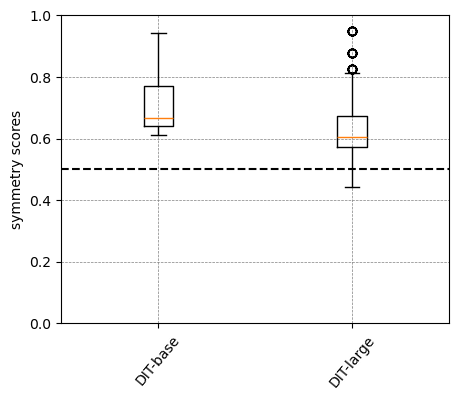

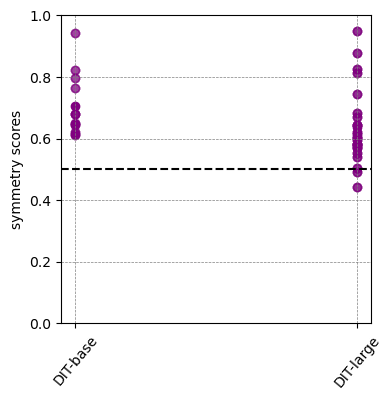

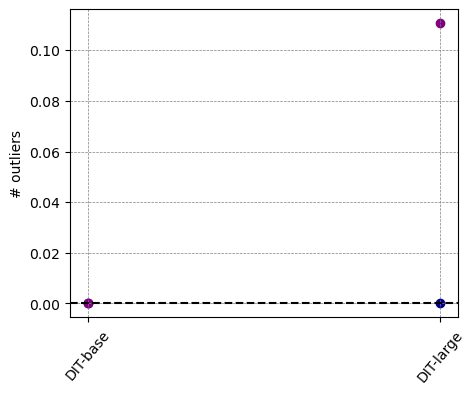

In [14]:
from utils.visualization import symmetry_score_boxplot, symmetry_score_scatter, symmetry_score_outliers

symmetry_score_boxplot(models)
symmetry_score_scatter(models)
symmetry_score_outliers(models)